# Homework #2 Part I: <br>Prove that as a function of $\theta$...

---

$$
\begin{align*}
&\color{white}{\propto}{} \exp\left[-\frac{1}{2}\left(\left(\sum_{i=1}^n \phi\left(x_i-\theta\right)^2\right)+ \tau\left(\theta-\theta_0\right)^2\right)\right] \\
&\propto{}  
\exp\left(-\frac{1}{2}  \left(\tau+n\phi\right) \left(\theta - \frac{1}{\tau+n\phi }\left(\tau\theta_0+\phi\sum _{i=1}^{n}x_{i}\right)\right)^2   \right)
\end{align*}$$

### Hint: expand the squares, and rebuild the quadratic in terms of $\theta$...


![HW2 Part1](img/sta365hw2q1.jpg)


# Homework #2 Part II: Complete the following... 

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*
    
    ```python
    for xi in range(x):
        print(xi)
    ```     
2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`
    
3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?
The posterior distribution is proportional to the product of the likelihood and the prior. It is also a normal distribution.
4. How do ***log likelihoods*** and ***posteriors*** differ from each other as a result of ***improper priors*** [discussed below] and ***marginal likelihood constants***?
Log-likelihood is independent of the prior. When an improper prior is used, the log-likelihood remains unaffected by the lack of normalization in the prior. The log posterior takes into account both the likelihood and the prior. The term logP(θ) may lack a proper normalization constant with an improper prioronstant. However, this issue is ofteln canceled out by the log of the marginal likelihood constant.

<!-- posteriorproporitional to joint... --> 


# The "Classic Bayes" Figure

Text(0.5, 1.0, 'Visualize prior, individual likelihoods, posteriors and joint distribution')

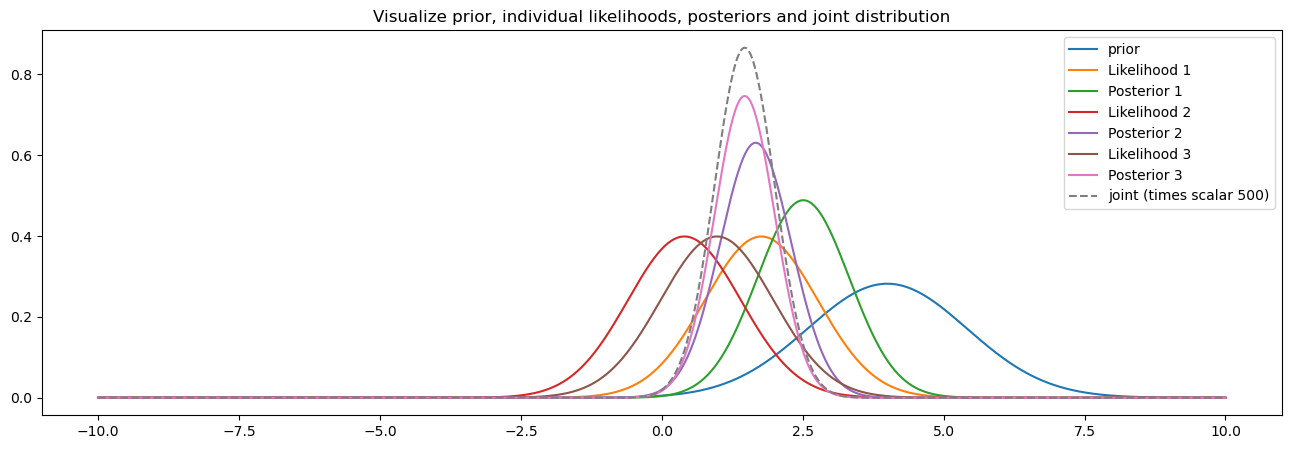

In [22]:
# imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# seed for reproducibility
np.random.seed(0)

# initialisations
n = 3
c,c2 = 500,10
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001) 
likelihood = stats.norm.pdf((x[:, np.newaxis]) * np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).prod(axis=0)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain) # What if p(theta) = 1?
joint = c*likelihood*prior # elementwise multiplication
# Calculate likelihood and posterior for each observation separately
likelihood_values = []
posterior_values = []
for i in range(n):
    likelihood_i = stats.norm.pdf(x[i], loc=parameter_domain, scale=1)
    likelihood_values.append(likelihood_i)
    posterior = stats.norm(loc=(tau*theta_0+x[:i+1].sum())/(tau+i+1), scale=1/(tau+i+1)**0.5).pdf(parameter_domain)
    posterior_values.append(posterior)
    
# Convert the list to a numpy array
likelihood_values = np.array(likelihood_values)
posterior_values = np.array(posterior_values)

# Plotting
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, prior, label="prior")
for i in range(n):
    plt.plot(parameter_domain, likelihood_values[i], label=f'Likelihood {i + 1}')
    plt.plot(parameter_domain, posterior_values[i], label=f'Posterior {i + 1}')
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize prior, individual likelihoods, posteriors and joint distribution") 

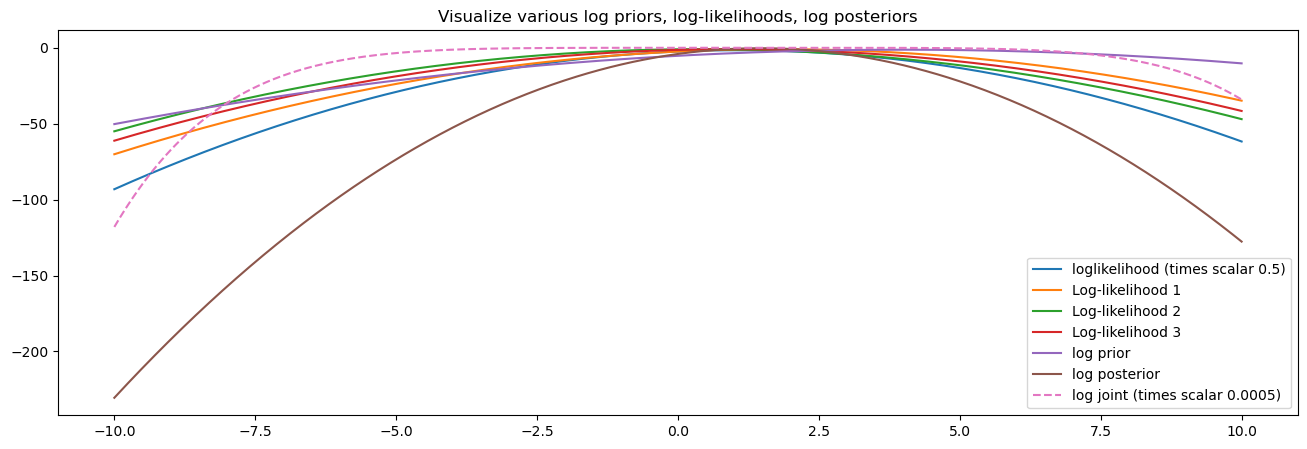

In [46]:
# imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(0)

# initialisation
c,c2 = 0.0005,.5; 
n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2; parameter_domain = np.linspace(-10,10,1001) 
log_likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), 
                            loc=parameter_domain, scale=1).sum(axis=0) # sigma=1 known. add vector values instead of multiply because log(a)+log(b) = log(ab)
log_likelihoods = []
for i in range(n):
    log_likelihood_i = stats.norm.logpdf(x[i], loc=parameter_domain, scale=1)
    log_likelihoods.append(log_likelihood_i)
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # What if p(theta) = 1?
joint = c*(likelihood+prior) # mult = addition in log space
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

# plotting
plt.figure(figsize=(16,5))
plt.plot(parameter_domain, c2*log_likelihood, label="loglikelihood (times scalar "+str(c2)+")")
for i in range(n):
    plt.plot(parameter_domain, log_likelihoods[i], label=f'Log-likelihood {i + 1}')
plt.plot(parameter_domain, prior, label="log prior")
plt.plot(parameter_domain, posterior, label="log posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="log joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize various log priors, log-likelihoods, log posteriors"); 